In [1]:
import pandas as pd
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *
from tournament import Tournament, Cup, WorldCup
%matplotlib inline

## Generate players

In [2]:
df = pd.read_csv('wcplayers.csv')

In [3]:
df

,Player,FideId
0,Maxime Vachier-Lagrave,623539
1,Levon Aronian,13300474
2,Wesley So,5202213
3,Ding Liren,8603677


In [4]:
players = []
for x in df.iterrows():
    row = x[1]
    players.append(Player(name=row[0], fide_id=row[1]))

## Web scraping

In [5]:
scrape_ratings(players)

In [6]:
players

[Maxime Vachier-Lagrave (2804),
 Levon Aronian (2802),
 Wesley So (2792),
 Ding Liren (2771)]

In [7]:
playerdict = {player.name: player for player in players}

In [8]:
scrape_scores(players)

Fetching head-to-head score between Maxime Vachier-Lagrave and Maxime Vachier-Lagrave
Fetching head-to-head score between Maxime Vachier-Lagrave and Levon Aronian
Fetching head-to-head score between Maxime Vachier-Lagrave and Wesley So
Fetching head-to-head score between Maxime Vachier-Lagrave and Ding Liren
Fetching head-to-head score between Levon Aronian and Maxime Vachier-Lagrave
Fetching head-to-head score between Levon Aronian and Levon Aronian
Fetching head-to-head score between Levon Aronian and Wesley So
Fetching head-to-head score between Levon Aronian and Ding Liren
Fetching head-to-head score between Wesley So and Maxime Vachier-Lagrave
Fetching head-to-head score between Wesley So and Levon Aronian
Fetching head-to-head score between Wesley So and Wesley So
Fetching head-to-head score between Wesley So and Ding Liren
Fetching head-to-head score between Ding Liren and Maxime Vachier-Lagrave
Fetching head-to-head score between Ding Liren and Levon Aronian
Fetching head-to-he

The scrape_scores() function takes a while to run, because it has to send a request to chessgames.com's slow search. The time complexity is O(n^2), which means it will become significantly faster as the World Cup progresses.

## Simulations

In [9]:
playerdict["Levon Aronian"].current_score = 1
playerdict["Wesley So"].current_score = 1
playerdict["Maxime Vachier-Lagrave"].current_score = 1
playerdict["Ding Liren"].current_score = 1

In [10]:
playerdict["Wesley So"].scores["Classical"]["Ding Liren"] = [1,2,11]
playerdict["Ding Liren"].scores["Classical"]["Wesley So"] = [2,1,11]
playerdict["Wesley So"].scores["Classical"]["Peter Svidler"] = [0,0,4]
playerdict["Wesley So"].scores["RapidBlitz"]["Peter Svidler"] = [0,0,0]
playerdict["Wesley So"].scores["Classical"]["Maxime Vachier-Lagrave"] = [1,4,9]
playerdict["Wesley So"].scores["RapidBlitz"]["Maxime Vachier-Lagrave"] = [2,10,15]
playerdict["Maxime Vachier-Lagrave"].scores["Classical"]["Wesley So"] = [4,1,9]
playerdict["Maxime Vachier-Lagrave"].scores["RapidBlitz"]["Wesley So"] = [10,2,15]
playerdict["Wesley So"].scores["Classical"]["Levon Aronian"] = [1,3,5]
playerdict["Wesley So"].scores["RapidBlitz"]["Levon Aronian"] = [3,5,11]
playerdict["Levon Aronian"].scores["Classical"]["Wesley So"] = [3,1,5]
playerdict["Levon Aronian"].scores["RapidBlitz"]["Wesley So"] = [5,3,11]

In [11]:
wc = WorldCup(players, 10, 1)

In [12]:
wc.cups(10000)

In [13]:
wc.print_results()

Maxime Vachier-Lagrave (2804) 48.74 %
Wesley So (2792) 22.49 %
Levon Aronian (2802) 20.3 %
Ding Liren (2771) 8.47 %


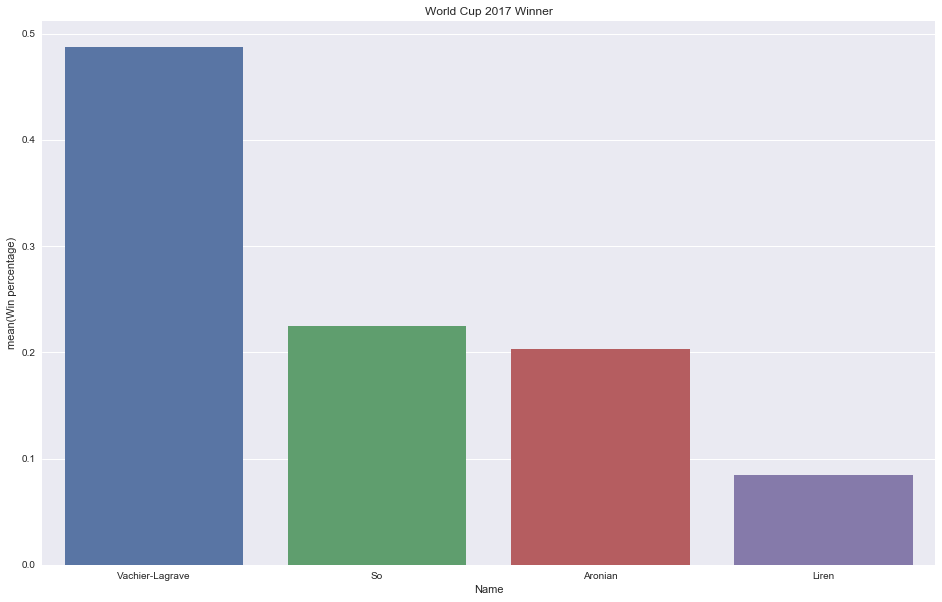

In [14]:
wc.plot_results("World Cup 2017 Winner")

In [15]:
wc.matches("Levon Aronian", "Maxime Vachier-Lagrave", 10000)

Levon Aronian (2802) 0.3251
Maxime Vachier-Lagrave (2804) 0.6749


In [16]:
wc.matches("Ding Liren", "Wesley So", 10000)

Ding Liren (2771) 0.2502
Wesley So (2792) 0.7498


In [415]:
import imp
imp.reload(tournament)
from tournament import WorldCup, Cup, Tournament